In [2]:
import pandas as pd

df = pd.read_csv('/Users/chentingkao/PracticeData/Mall_customers.csv')

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,2,21,15,81
2,3,20,16,6
3,4,23,16,77
4,5,31,17,40


In [3]:
# check if there is na value or null value
print(df.isnull().sum() + df.isna().sum())

CustomerID                0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


In [7]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
features_df = df.drop(['CustomerID', 'Age'], axis = 1)
scaled_features = scaler.fit_transform(features_df)
scaled_features_df = pd.DataFrame(scaled_df, columns = features_df.columns)

In [11]:
# The elbow method is a popular technique used in unsupervised machine learning
# to determine the optimal number of clusters in a dataset when using clustering
# algorithms such as K-means. The idea is to run the clustering algorithm for a
# range of values for (number of clusters), and for each k, calculate a metric
# that quantifies how well the clustering fits the data.

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

scores = []

for i in range(2, 11):
  kmeans_model = KMeans(n_clusters = i, random_state = 42)
  cluster_label = kmeans_model.fit_predict(scaled_features_df)
  scores.append(silhouette_score(scaled_features_df, cluster_label))

# find largest value and its index.
largest_index = 0
largest_value = 0
for i in range(len(scores)):
  if scores[i] > largest_value:
    largest_value = scores[i]
    largest_index = i

optimal_k = largest_index + 2

In [18]:
# Assign clusters based on the optimal model
optimal_model = KMeans(n_clusters = optimal_k, random_state = 42)
df['cluster'] = optimal_model.fit_predict(scaled_features_df)

[[-0.20091257 -0.02645617]
 [ 0.99158305  1.23950275]
 [-1.32954532  1.13217788]
 [ 1.05500302 -1.28443907]
 [-1.30751869 -1.13696536]]


In [19]:
# Find the centers in the original scale
cluster_centers = scaler.inverse_transform(optimal_model.cluster_centers_)

cluster_data = pd.DataFrame(cluster_centers, columns=features_df.columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 2 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Annual Income (k$)      5 non-null      float64
 1   Spending Score (1-100)  5 non-null      float64
dtypes: float64(2)
memory usage: 212.0 bytes


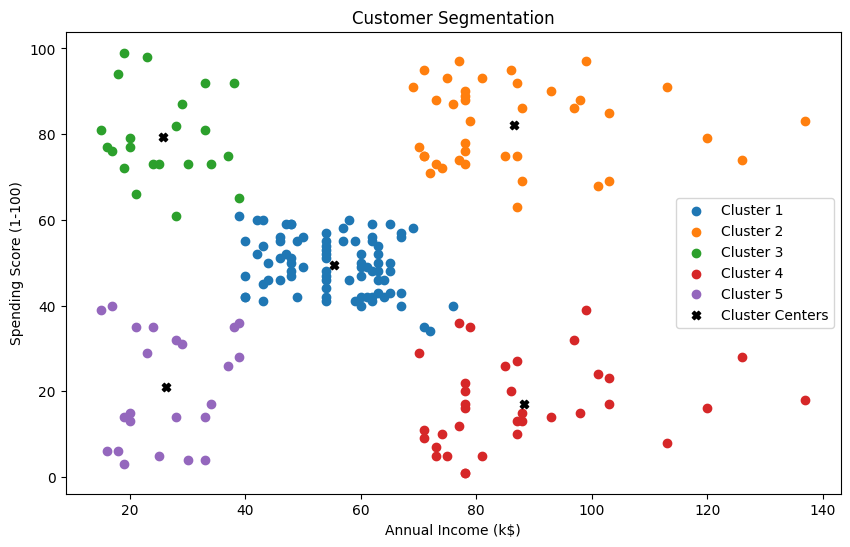

In [21]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
for cluster in range(optimal_k):
    cluster_points = df[df['cluster'] == cluster] # dataframe by cluster number
    plt.scatter(cluster_points['Annual Income (k$)'], cluster_points['Spending Score (1-100)'], label=f'Cluster {cluster + 1}')

plt.scatter(cluster_data['Annual Income (k$)'], cluster_data['Spending Score (1-100)'], color='black', marker='X', label='Cluster Centers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Customer Segmentation')
plt.legend()
plt.show()

In [23]:

# reset_index resets the index of the resulting DataFrame. After the groupby
# operation, the cluster labels become the index of the resulting DataFrame.
# reset_index converts these indices back into a regular column, making the
# DataFrame easier to work with.
cluster_summary = df.groupby('cluster').agg({
    'Annual Income (k$)': ['mean', 'std', 'count'],
    'Spending Score (1-100)': ['mean', 'std']
}).reset_index()

# Rename columns for clarity
cluster_summary.columns = ['cluster', 'Avg_Annual_Income', 'Std_Annual_Income', 'Count', 'Avg_Spending_Score', 'Std_Spending_Score']

# Sort clusters by average spending score
cluster_summary = cluster_summary.sort_values(by='Avg_Spending_Score', ascending=False)

# Display the cluster summary
print(cluster_summary)

   cluster  Avg_Annual_Income  Std_Annual_Income  Count  Avg_Spending_Score  \
1        1          86.538462          16.312485     39           82.128205   
2        2          25.727273           7.566731     22           79.363636   
0        0          55.296296           8.988109     81           49.518519   
4        4          26.304348           7.893811     23           20.913043   
3        3          88.200000          16.399067     35           17.114286   

   Std_Spending_Score  
1            9.364489  
2           10.504174  
0            6.530909  
4           13.017167  
3            9.952154  
